In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#clear output
from IPython.display import clear_output
import time

### record from webcam

In [10]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while(True):
	ret, frame = cap.read() 
	out.write(frame)
	cv2.imshow('Original', frame)
	 
	if cv2.waitKey(1) & 0xFF == ord('q'):
		break


cap.release()
out.release()
cv2.destroyAllWindows()

### load and show video

In [2]:
video=cv2.VideoCapture('output.avi')
imgs=[]
while(video.isOpened()):
    ret, frame = video.read()
    if ret==False: break
    imgs.append(frame)

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()


In [3]:
len(imgs)

435

In [5]:
video=cv2.VideoCapture('output_trim.avi')
imgs=[]
while(video.isOpened()):
    ret, frame = video.read()
    if ret==False: break
    imgs.append(frame)

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

In [7]:
imgs2=[]
for i in range(0, len(imgs), 5):
    imgs2.append(imgs[i])
len(imgs2)

10

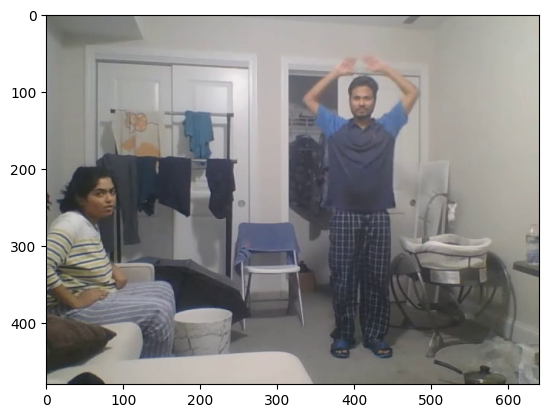

In [12]:
for img in imgs2:
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    time.sleep(0.1)
    clear_output(wait=True)

In [1]:
import numpy as np
import os
import cv2


filename = 'video.avi'
frames_per_second = 24.0
res = '720p'

# Set resolution for the video capture
# Function adapted from https://kirr.co/0l6qmh
def change_res(cap, width, height):
    cap.set(3, width)
    cap.set(4, height)

# Standard Video Dimensions Sizes
STD_DIMENSIONS =  {
    "480p": (640, 480),
    "720p": (1280, 720),
    "1080p": (1920, 1080),
    "4k": (3840, 2160),
}


# grab resolution dimensions and set video capture to it.
def get_dims(cap, res='1080p'):
    width, height = STD_DIMENSIONS["480p"]
    if res in STD_DIMENSIONS:
        width,height = STD_DIMENSIONS[res]
    ## change the current caputre device
    ## to the resulting resolution
    change_res(cap, width, height)
    return width, height

# Video Encoding, might require additional installs
# Types of Codes: http://www.fourcc.org/codecs.php
VIDEO_TYPE = {
    'avi': cv2.VideoWriter_fourcc(*'XVID'),
    #'mp4': cv2.VideoWriter_fourcc(*'H264'),
    'mp4': cv2.VideoWriter_fourcc(*'XVID'),
}

def get_video_type(filename):
    filename, ext = os.path.splitext(filename)
    if ext in VIDEO_TYPE:
      return  VIDEO_TYPE[ext]
    return VIDEO_TYPE['avi']

cap = cv2.VideoCapture(1)
out = cv2.VideoWriter(filename, get_video_type(filename), 25, get_dims(cap, res))

while True:
    ret, frame = cap.read()
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()